In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin1')
print("Rows:", df.shape[0], "Cols:", df.shape[1])
df.head()


Rows: 9994 Cols: 21


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Remove duplicates and missing values
df = df.drop_duplicates().dropna()
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y', errors='coerce')
if df['Order Date'].isnull().sum() > 0:
    df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
# Feature engineering
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter
df['Month_Name'] = df['Order Date'].dt.month_name()
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Quarter,Month_Name,Profit_Margin
0,1,CA-2016-152156,2016-08-11,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016.0,8.0,3.0,August,16.00
1,2,CA-2016-152156,2016-08-11,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016.0,8.0,3.0,August,30.00
2,3,CA-2016-138688,2016-12-06,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016.0,12.0,4.0,December,47.00
3,4,US-2015-108966,2015-11-10,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015.0,11.0,4.0,November,-40.00
4,5,US-2015-108966,2015-11-10,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015.0,11.0,4.0,November,11.25


In [5]:
df.to_csv('/content/cleaned_retail_data.csv', index=False)
from google.colab import files
files.download('/content/cleaned_retail_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

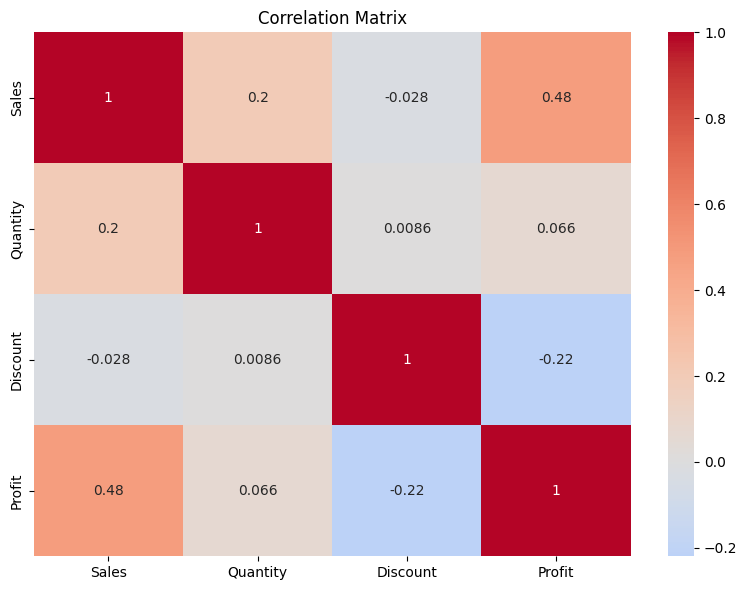

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('/content/correlation_matrix.png', bbox_inches='tight')
plt.show()

from google.colab import files
files.download('/content/correlation_matrix.png')


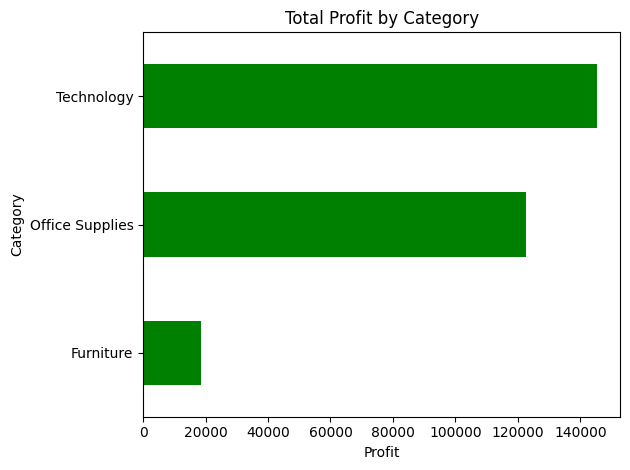

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
cat_profit = df.groupby('Category')['Profit'].sum().sort_values()
colors = ['red' if x < 0 else 'green' for x in cat_profit.values]
cat_profit.plot(kind='barh', color=colors)
plt.title('Total Profit by Category')
plt.xlabel('Profit')
plt.tight_layout()  # Ensures labels/titles fit

# Save BEFORE plt.show()
plt.savefig('/content/profit_by_category.png', bbox_inches='tight')

plt.show()

from google.colab import files
files.download('/content/profit_by_category.png')



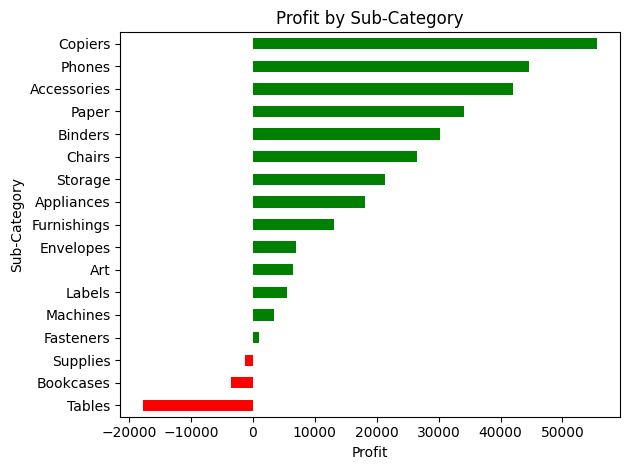

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
colors = ['red' if x < 0 else 'green' for x in subcat_profit.values]
subcat_profit.plot(kind='barh', color=colors)
plt.title('Profit by Sub-Category')
plt.xlabel('Profit')
plt.tight_layout()
plt.savefig('/content/profit_by_subcategory.png', bbox_inches='tight')
plt.show()

from google.colab import files
files.download('/content/profit_by_subcategory.png')


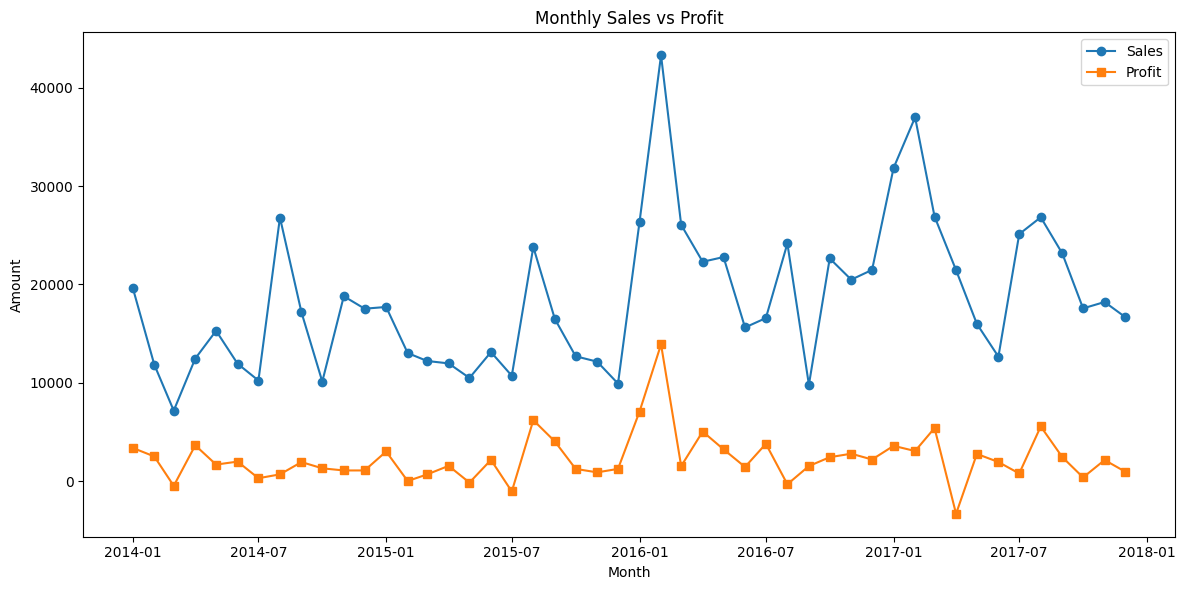

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
monthly = df.groupby(['Year', 'Month'])[['Sales', 'Profit']].sum().reset_index()
monthly['MonthStart'] = pd.to_datetime(dict(year=monthly['Year'], month=monthly['Month'], day=1))
plt.figure(figsize=(12,6))
plt.plot(monthly['MonthStart'], monthly['Sales'], label='Sales', marker='o')
plt.plot(monthly['MonthStart'], monthly['Profit'], label='Profit', marker='s')
plt.title('Monthly Sales vs Profit')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.savefig('/content/monthly_sales_profit.png', bbox_inches='tight')
plt.show()

from google.colab import files
files.download('/content/monthly_sales_profit.png')


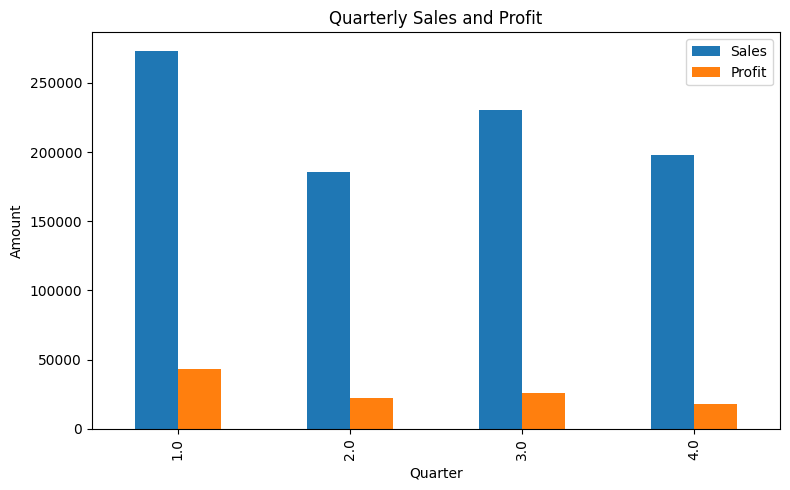

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
quarterly = df.groupby('Quarter')[['Sales','Profit']].sum()
quarterly.plot(kind='bar', figsize=(8,5))
plt.title('Quarterly Sales and Profit')
plt.xlabel('Quarter')
plt.ylabel('Amount')
plt.tight_layout()
plt.savefig('/content/quarterly_sales_profit.png', bbox_inches='tight')
plt.show()

from google.colab import files
files.download('/content/quarterly_sales_profit.png')


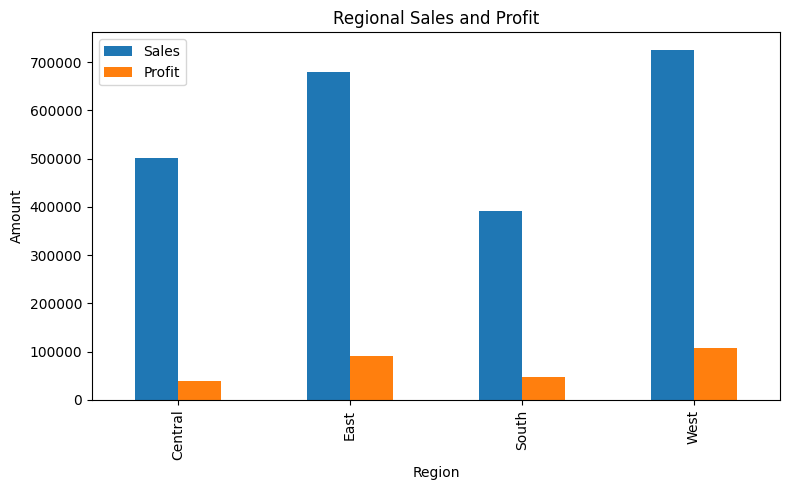

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
regional = df.groupby('Region')[['Sales','Profit']].sum()
regional.plot(kind='bar', figsize=(8,5))
plt.title('Regional Sales and Profit')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.tight_layout()
plt.savefig('/content/regional_sales_profit.png', bbox_inches='tight')
plt.show()

from google.colab import files
files.download('/content/regional_sales_profit.png')


In [20]:
print("="*60)
print("RETAIL BUSINESS ANALYSIS: EXECUTIVE INSIGHTS")
print("="*60)

# Overall KPIs
print(f"Total Sales:        ${df['Sales'].sum():,.2f}")
print(f"Total Profit:       ${df['Profit'].sum():,.2f}")
print(f"Profit Margin:      {df['Profit'].sum()/df['Sales'].sum():.2%}")
print(f"Total Orders:       {df.shape[0]:,}")

# Category summary
cat_stats = df.groupby('Category').agg({'Sales':'sum','Profit':'sum'})
cat_stats['Profit Margin %'] = (cat_stats['Profit']/cat_stats['Sales']*100).round(2)
print("\nProfit by Category:")
print(cat_stats)

# Best and worst sub-categories
top_sub = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(5)
worst_sub = df.groupby('Sub-Category')['Profit'].sum().sort_values().head(5)
print("\nTop 5 Profitable Sub-Categories:")
print(top_sub)
print("\nBottom 5 Loss-Making Sub-Categories:")
print(worst_sub)

# Quarterly pattern
qtr_stats = df.groupby('Quarter').agg({'Sales':'sum','Profit':'sum'})
print("\nSales and Profit by Quarter:")
print(qtr_stats)

# Regional summary
region_stats = df.groupby('Region').agg({'Sales':'sum', 'Profit':'sum'})
print("\nRegional Performance (Sales & Profit):")
print(region_stats)

# Discount/profit impact
discount_bins = pd.cut(df['Discount'], bins=[0, 0.1, 0.2, 0.3, 1.0], labels=['0-10%', '10-20%', '20-30%', '30%+'])
discount_impact = df.groupby(discount_bins)['Profit'].mean()
print("\nAverage Profit by Discount Range:")
print(discount_impact)

# Executive Summary
print("\nExecutive Summary:")
print(f"- Technology leads in profit margin ({cat_stats.loc['Technology', 'Profit Margin %']}%).")
print("- Copiers and Phones drive highest sub-category profits; Tables and Bookcases are main loss-makers.")
print("- Q4 is peak season for both sales and profit; Q1 is lowest.")
print("- West and East regions outperform Central and South.")
print("- Discounts above 20% rapidly decrease average profit on transactions.")
print("="*60)


RETAIL BUSINESS ANALYSIS: EXECUTIVE INSIGHTS
Total Sales:        $2,297,200.86
Total Profit:       $286,397.02
Profit Margin:      12.47%
Total Orders:       9,994

Profit by Category:
                       Sales       Profit  Profit Margin %
Category                                                  
Furniture        741999.7953   18451.2728             2.49
Office Supplies  719047.0320  122490.8008            17.04
Technology       836154.0330  145454.9481            17.40

Top 5 Profitable Sub-Categories:
Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Name: Profit, dtype: float64

Bottom 5 Loss-Making Sub-Categories:
Sub-Category
Tables      -17725.4811
Bookcases    -3472.5560
Supplies     -1189.0995
Fasteners      949.5182
Machines      3384.7569
Name: Profit, dtype: float64

Sales and Profit by Quarter:
               Sales      Profit
Quarter                         
1.0      272983.61